In [ ]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.5/89.5 kB 9.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 79.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.4/348.4 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.4 MB/s eta 0:00:00
  Created wheel for pattern: filename=Pattern-3.6-py3-none-

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [ ]:
from pattern.en import parse

In [ ]:
from pattern.en import sentiment

In [ ]:
import pandas as pd
from tqdm import tqdm

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.<br>
Diagnosis, treatment, discharge status, symptoms

In [ ]:
data1 = pd.read_parquet('/content/train-00000-of-00001-ab3fbf4a5662c2a8.parquet')

In [ ]:
data1.head()

,MeSH,Problems,findings,impression
0,Atherosclerosis/aorta;Arthritis,Atherosclerosis;Arthritis,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.
1,Bullous Emphysema/lung/apex/bilateral;Thoracic...,Bullous Emphysema;Thoracic Vertebrae,Cardiomediastinal silhouette are normal in siz...,1. No acute cardiopulmonary abnormality. 2. St...
2,Breast Implants/bilateral,Breast Implants,The heart is normal in size. The mediastinum i...,No acute disease.
3,Calcified Granuloma/lung/middle lobe,Calcified Granuloma,The cardiomediastinal silhouette is normal in ...,Negative for acute abnormality.
4,Lung/hypoinflation;Markings/bronchovascular,Lung;Markings,There are lower lung volumes. There is central...,No acute abnormality identified.


In [ ]:
def find_sentiment(text):
  return sentiment(text)

In [ ]:
# data1['MeSH_sentiment'] = data1['MeSH'].apply(lambda x: find_sentiment(x))
def senti_subject(column, data=data1):
  sentiments, subjectivities = [], []
  sent_subj = [sentiment(txt) for txt in data[column]]
  for sent_subj_ in sent_subj:
    sentiments.append(sent_subj_[0])
    subjectivities.append(sent_subj_[1])

  return sentiments, subjectivities

senti_subj_columns = ['MeSH', 'Problems', 'findings', 'impression']
for col in senti_subj_columns:
  sents, subjs = senti_subject(col)
  data1[f'{col} Sentiment'] = sents
  data1[f'{col} Subjectivity'] = subjs

In [ ]:
data1.head(100)

,MeSH,Problems,findings,impression,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
0,Atherosclerosis/aorta;Arthritis,Atherosclerosis;Arthritis,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,0.00,0.00,0.00,0.00,-0.043750,0.629167,-0.300000,0.900000
1,Bullous Emphysema/lung/apex/bilateral;Thoracic...,Bullous Emphysema;Thoracic Vertebrae,Cardiomediastinal silhouette are normal in siz...,1. No acute cardiopulmonary abnormality. 2. St...,0.00,0.00,0.00,0.00,0.241667,0.575000,-0.300000,0.900000
2,Breast Implants/bilateral,Breast Implants,The heart is normal in size. The mediastinum i...,No acute disease.,0.00,0.00,0.00,0.00,0.125000,0.516667,-0.300000,0.900000
3,Calcified Granuloma/lung/middle lobe,Calcified Granuloma,The cardiomediastinal silhouette is normal in ...,Negative for acute abnormality.,0.00,0.00,0.00,0.00,0.042857,0.425714,0.150000,0.650000
4,Lung/hypoinflation;Markings/bronchovascular,Lung;Markings,There are lower lung volumes. There is central...,No acute abnormality identified.,0.00,0.00,0.00,0.00,0.095238,0.261905,-0.300000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Lung/hyperdistention;Spine/degenerative,Lung;Spine,The cardiomediastinal silhouette and vasculatu...,1. No acute radiographic cardiopulmonary process.,0.00,0.00,0.00,0.00,0.150000,0.650000,-0.300000,0.900000
96,normal,normal,Both lungs are clear and expanded. Heart and m...,No active disease..,0.15,0.65,0.15,0.65,0.125000,0.516667,0.066667,0.600000
97,normal,normal,Heart size is within normal limits. No focal a...,No acute cardiopulmonary findings.,0.15,0.65,0.15,0.65,0.150000,0.650000,-0.300000,0.900000
98,Spine/degenerative,Spine,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,0.00,0.00,0.00,0.00,0.125000,0.516667,-0.100000,0.641667


In [ ]:
data1.describe()

,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000,2831.000000
mean,0.052729,0.235685,0.052393,0.236003,0.096404,0.488217,-0.107899,0.694822
std,0.074225,0.311144,0.075173,0.311056,0.100270,0.144630,0.244963,0.262766
min,-0.316667,0.000000,-0.316667,0.000000,-0.400000,0.000000,-0.400000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.041071,0.385884,-0.300000,0.535714
50%,0.000000,0.000000,0.000000,0.000000,0.116667,0.516667,-0.300000,0.900000
75%,0.150000,0.650000,0.150000,0.650000,0.150000,0.575000,0.066667,0.900000
max,0.150000,0.650000,0.150000,0.650000,0.466667,0.900000,0.600000,1.000000


In [ ]:
string_sentiment = []

for index, v in data1[['MeSH Sentiment', 'Problems Sentiment', 'findings Sentiment', 'impression Sentiment']].iterrows():
  avg_sent = sum([v['MeSH Sentiment'], v['Problems Sentiment'], v['findings Sentiment'], v['impression Sentiment']])

  if avg_sent < 0:
    string_sentiment.append('Negative')
  elif avg_sent > 0:
    string_sentiment.append('Positive')
  else:
    string_sentiment.append('Neutral')

data1['Avg Sentiment'] = string_sentiment
data1.head()

,MeSH,Problems,findings,impression,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity,Avg Sentiment
0,Atherosclerosis/aorta;Arthritis,Atherosclerosis;Arthritis,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,0.0,0.0,0.0,0.0,-0.043750,0.629167,-0.30,0.90,Negative
1,Bullous Emphysema/lung/apex/bilateral;Thoracic...,Bullous Emphysema;Thoracic Vertebrae,Cardiomediastinal silhouette are normal in siz...,1. No acute cardiopulmonary abnormality. 2. St...,0.0,0.0,0.0,0.0,0.241667,0.575000,-0.30,0.90,Negative
2,Breast Implants/bilateral,Breast Implants,The heart is normal in size. The mediastinum i...,No acute disease.,0.0,0.0,0.0,0.0,0.125000,0.516667,-0.30,0.90,Negative
3,Calcified Granuloma/lung/middle lobe,Calcified Granuloma,The cardiomediastinal silhouette is normal in ...,Negative for acute abnormality.,0.0,0.0,0.0,0.0,0.042857,0.425714,0.15,0.65,Positive
4,Lung/hypoinflation;Markings/bronchovascular,Lung;Markings,There are lower lung volumes. There is central...,No acute abnormality identified.,0.0,0.0,0.0,0.0,0.095238,0.261905,-0.30,0.90,Negative


In [ ]:
data1.to_csv('Medical_Reports_Split_pattern.csv', index=False)

In [ ]:
column_names = ['MeSH Sentiment', 'Problems Sentiment', 'findings Sentiment', 'impression Sentiment']
data_frames = {}

for column in column_names:
    neg_df = data1[data1[column] < 0.0].copy()
    pos_df = data1[data1[column] > 0.0].copy()
    neu_df = data1[data1[column] == 0.0].copy()

    # Create separate data frames
    data_frames[column + '_neg'] = neg_df.copy()
    data_frames[column + '_pos'] = pos_df.copy()
    data_frames[column + '_neu'] = neu_df.copy()

In [ ]:
print(list(data_frames.keys()))

['MeSH Sentiment_neg', 'MeSH Sentiment_pos', 'MeSH Sentiment_neu', 'Problems Sentiment_neg', 'Problems Sentiment_pos', 'Problems Sentiment_neu', 'findings Sentiment_neg', 'findings Sentiment_pos', 'findings Sentiment_neu', 'impression Sentiment_neg', 'impression Sentiment_pos', 'impression Sentiment_neu']


In [ ]:
for key in data_frames.keys():
    print(key)
    display(data_frames[key].describe())
    print()

MeSH Sentiment_neg


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,-0.091667,0.058333,-0.091667,0.058333,0.083665,0.387576,-0.060644,0.510597
std,0.073895,0.090200,0.073895,0.090200,0.092671,0.114371,0.208807,0.284925
min,-0.316667,0.000000,-0.316667,0.000000,-0.134375,0.137500,-0.316667,0.000000
25%,-0.125000,0.000000,-0.125000,0.000000,0.010833,0.331169,-0.300000,0.310417
50%,-0.050000,0.000000,-0.050000,0.000000,0.094444,0.385000,-0.055556,0.450000
75%,-0.050000,0.125000,-0.050000,0.125000,0.140625,0.451339,0.129464,0.875000
max,-0.050000,0.300000,-0.050000,0.300000,0.308333,0.675000,0.333333,0.900000



MeSH Sentiment_pos


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,1.019000e+03,1.019000e+03,1.019000e+03,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000
mean,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.107935,0.549593,-0.183399,0.794009
std,2.776920e-17,2.221536e-16,2.776920e-17,2.221536e-16,0.096517,0.129826,0.209007,0.187347
min,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,-0.300000,0.000000,-0.300000,0.000000
25%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.066667,0.516667,-0.300000,0.650000
50%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.125000,0.539286,-0.300000,0.900000
75%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.150000,0.644444,-0.133333,0.900000
max,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.375000,0.900000,0.600000,0.900000



MeSH Sentiment_neu


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,1773.0,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.0,0.001466,-0.000536,0.001974,0.090057,0.455157,-0.065546,0.641868
std,0.0,0.012024,0.013019,0.017181,0.101983,0.141284,0.254326,0.281346
min,0.0,0.000000,-0.316667,0.000000,-0.400000,0.000000,-0.400000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.029762,0.358929,-0.300000,0.448214
50%,0.0,0.000000,0.000000,0.000000,0.100000,0.464286,-0.128571,0.650000
75%,0.0,0.000000,0.000000,0.000000,0.150000,0.539286,0.072109,0.900000
max,0.0,0.100000,0.000000,0.300000,0.466667,0.900000,0.600000,1.000000



Problems Sentiment_neg


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,-0.085119,0.054167,-0.107738,0.075595,0.087271,0.394490,-0.053072,0.500713
std,0.075046,0.088158,0.092199,0.107279,0.095170,0.126208,0.203112,0.276721
min,-0.316667,0.000000,-0.316667,0.000000,-0.134375,0.137500,-0.316667,0.000000
25%,-0.125000,0.000000,-0.125000,0.000000,0.005417,0.329870,-0.300000,0.311786
50%,-0.050000,0.000000,-0.050000,0.000000,0.097222,0.385527,-0.025000,0.425000
75%,-0.050000,0.125000,-0.050000,0.125000,0.142187,0.460119,0.123710,0.800000
max,0.000000,0.300000,-0.050000,0.300000,0.308333,0.700000,0.333333,0.900000



Problems Sentiment_pos


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,1.019000e+03,1.019000e+03,1.019000e+03,1.019000e+03,1019.000000,1019.000000,1019.000000,1019.000000
mean,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.107935,0.549593,-0.183399,0.794009
std,2.776920e-17,2.221536e-16,2.776920e-17,2.221536e-16,0.096517,0.129826,0.209007,0.187347
min,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,-0.300000,0.000000,-0.300000,0.000000
25%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.066667,0.516667,-0.300000,0.650000
50%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.125000,0.539286,-0.300000,0.900000
75%,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.150000,0.644444,-0.133333,0.900000
max,1.500000e-01,6.500000e-01,1.500000e-01,6.500000e-01,0.375000,0.900000,0.600000,0.900000



Problems Sentiment_neu


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,1770.0,1770.000000,1770.0,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,0.0,0.001469,0.0,0.001469,0.089982,0.455107,-0.065734,0.642325
std,0.0,0.012034,0.0,0.012034,0.101949,0.141138,0.254497,0.281364
min,0.0,0.000000,0.0,0.000000,-0.400000,0.000000,-0.400000,0.000000
25%,0.0,0.000000,0.0,0.000000,0.029821,0.358929,-0.300000,0.450000
50%,0.0,0.000000,0.0,0.000000,0.100000,0.463889,-0.132738,0.650000
75%,0.0,0.000000,0.0,0.000000,0.150000,0.539286,0.071939,0.900000
max,0.0,0.100000,0.0,0.100000,0.466667,0.900000,0.600000,1.000000



findings Sentiment_neg


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000
mean,0.041546,0.191102,0.040779,0.191828,-6.800154e-02,0.526460,-0.144265,0.689681
std,0.071785,0.294665,0.073890,0.294563,6.477111e-02,0.177613,0.231082,0.275402
min,-0.316667,0.000000,-0.316667,0.000000,-4.000000e-01,0.047619,-0.400000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-7.936508e-02,0.392857,-0.300000,0.483929
50%,0.000000,0.000000,0.000000,0.000000,-5.416667e-02,0.516667,-0.300000,0.900000
75%,0.150000,0.650000,0.150000,0.650000,-1.666667e-02,0.644444,0.000000,0.900000
max,0.150000,0.650000,0.150000,0.650000,-2.775558e-18,0.900000,0.600000,0.900000



findings Sentiment_pos


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,2361.000000,2361.000000,2361.000000,2361.000000,2.361000e+03,2361.000000,2361.000000,2361.000000
mean,0.054179,0.241465,0.053911,0.241720,1.274901e-01,0.484676,-0.102693,0.695394
std,0.074408,0.312782,0.075170,0.312707,7.350185e-02,0.127322,0.244817,0.259668
min,-0.316667,0.000000,-0.316667,0.000000,2.312965e-18,0.063889,-0.400000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.500000e-02,0.387500,-0.300000,0.550000
50%,0.000000,0.000000,0.000000,0.000000,1.250000e-01,0.516667,-0.300000,0.900000
75%,0.150000,0.650000,0.150000,0.650000,1.500000e-01,0.561111,0.066667,0.900000
max,0.150000,0.650000,0.150000,0.650000,4.666667e-01,0.850000,0.600000,1.000000



findings Sentiment_neu


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000
mean,0.073684,0.319298,0.073684,0.319298,0.0,0.357812,-0.060046,0.708388
std,0.075655,0.327838,0.075655,0.327838,0.0,0.336470,0.317082,0.298824
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.300000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.300000,0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.440000,-0.250000,0.900000
75%,0.150000,0.650000,0.150000,0.650000,0.0,0.733333,0.075000,0.900000
max,0.150000,0.650000,0.150000,0.650000,0.0,0.733333,0.600000,1.000000



impression Sentiment_neg


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000,1831.000000
mean,0.063690,0.282523,0.063690,0.282523,0.094065,0.509951,-0.262778,0.805005
std,0.076629,0.321256,0.076629,0.321256,0.105603,0.144400,0.077189,0.182998
min,-0.316667,0.000000,-0.316667,0.000000,-0.400000,0.000000,-0.400000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.026361,0.416815,-0.300000,0.900000
50%,0.000000,0.000000,0.000000,0.000000,0.108929,0.516667,-0.300000,0.900000
75%,0.150000,0.650000,0.150000,0.650000,0.150000,0.629167,-0.300000,0.900000
max,0.150000,0.650000,0.150000,0.650000,0.466667,0.900000,-0.003571,0.900000



impression Sentiment_pos


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,0.035818,0.164641,0.034681,0.165719,0.107163,0.453145,0.210401,0.574686
std,0.067375,0.280337,0.070572,0.280278,0.085874,0.129686,0.184778,0.194860
min,-0.316667,0.000000,-0.316667,0.000000,-0.350000,0.000000,0.002083,0.083333
25%,0.000000,0.000000,0.000000,0.000000,0.064732,0.363681,0.066667,0.407143
50%,0.000000,0.000000,0.000000,0.000000,0.125000,0.476190,0.150000,0.600000
75%,0.000000,0.212500,0.000000,0.300000,0.147480,0.529286,0.285714,0.650000
max,0.150000,0.650000,0.150000,0.650000,0.350000,0.825000,0.600000,1.000000



impression Sentiment_neu


,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.000000
mean,0.016667,0.075455,0.016667,0.075455,0.067906,0.424529,0.0,0.080081
std,0.048556,0.208041,0.048556,0.208041,0.100418,0.164756,0.0,0.188287
min,-0.050000,0.000000,-0.050000,0.000000,-0.300000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.020000,0.325000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.077679,0.416667,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.133333,0.521429,0.0,0.000000
max,0.150000,0.650000,0.150000,0.650000,0.291667,0.900000,0.0,1.000000


In [ ]:
import scipy.stats as stats

# Example for computing p-value for a specific dataset
positive_data = data_frames['MeSH Sentiment_pos']['MeSH Sentiment']  # Replace 'Column1' with the actual column name

# Define the null hypothesis value
null_value = 0.0

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(positive_data, null_value)

print(f"Positive Dataset - MeSH Sentiment:")
print(f"Null Hypothesis Value: {null_value}")
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


Positive Dataset - MeSH Sentiment:
Null Hypothesis Value: 0.0
t-statistic: 1.7243082638027645e+17
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import scipy.stats as stats

# Example for computing CI for a specific dataset
positive_data = data_frames['MeSH Sentiment_pos']['findings Sentiment']  # Replace 'Column_Name' with the actual column name

# Compute CI
ci = stats.t.interval(0.95, len(positive_data) - 1, loc=positive_data.mean(), scale=stats.sem(positive_data))


In [ ]:
ci

(0.10200151864346395, 0.11386776430033184)

HYPOTHESIS TESTING (huggingface dataset)
---

In [ ]:
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(data1['MeSH Subjectivity'], data1['MeSH Sentiment'])
print(corr)
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

0.9748375140078488
Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(data1['Problems Subjectivity'], data1['Problems Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(data1['findings Subjectivity'], data1['findings Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(data1['impression Subjectivity'], data1['impression Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
#Hypothesis 2:
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['Problems Subjectivity'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [ ]:
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['findings Subjectivity'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['impression Subjectivity'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['Problems Sentiment'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['findings Sentiment'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
medical_specialties = data1['MeSH'].unique()
groups = [data1[data1['MeSH'] == specialty]['impression Sentiment'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
from scipy.stats import pearsonr

# Extract the relevant columns from the dataset
transcription_length = data1['Problems'].apply(len)
sentiment_scores = data1['Problems Sentiment']

# Perform the correlation test
corr, p_value = pearsonr(transcription_length, sentiment_scores)

# Check the p-value to determine if the null hypothesis is rejected
if p_value < 0.05:
    print("Hypothesis: Reject the null hypothesis")
else:
    print("Hypothesis: Fail to reject the null hypothesis")


Hypothesis: Reject the null hypothesis


In [ ]:
# Extract the relevant columns from the dataset
transcription_length = data1['findings'].apply(len)
sentiment_scores = data1['findings Sentiment']

# Perform the correlation test
corr, p_value = pearsonr(transcription_length, sentiment_scores)

# Check the p-value to determine if the null hypothesis is rejected
if p_value < 0.05:
    print("Hypothesis: Reject the null hypothesis")
else:
    print("Hypothesis: Fail to reject the null hypothesis")

Hypothesis: Reject the null hypothesis


In [ ]:
# Extract the relevant columns from the dataset
transcription_length = data1['impression'].apply(len)
sentiment_scores = data1['impression Sentiment']

# Perform the correlation test
corr, p_value = pearsonr(transcription_length, sentiment_scores)

# Check the p-value to determine if the null hypothesis is rejected
if p_value < 0.05:
    print("Hypothesis: Reject the null hypothesis")
else:
    print("Hypothesis: Fail to reject the null hypothesis")

Hypothesis: Reject the null hypothesis


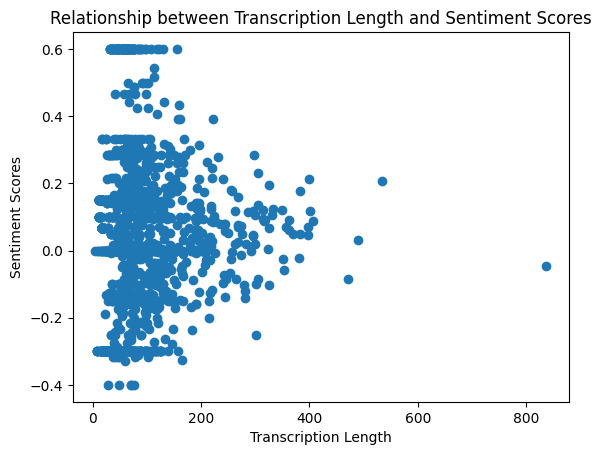

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(transcription_length, sentiment_scores)
plt.xlabel('Transcription Length')
plt.ylabel('Sentiment Scores')
plt.title('Relationship between Transcription Length and Sentiment Scores')
plt.show()


---

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

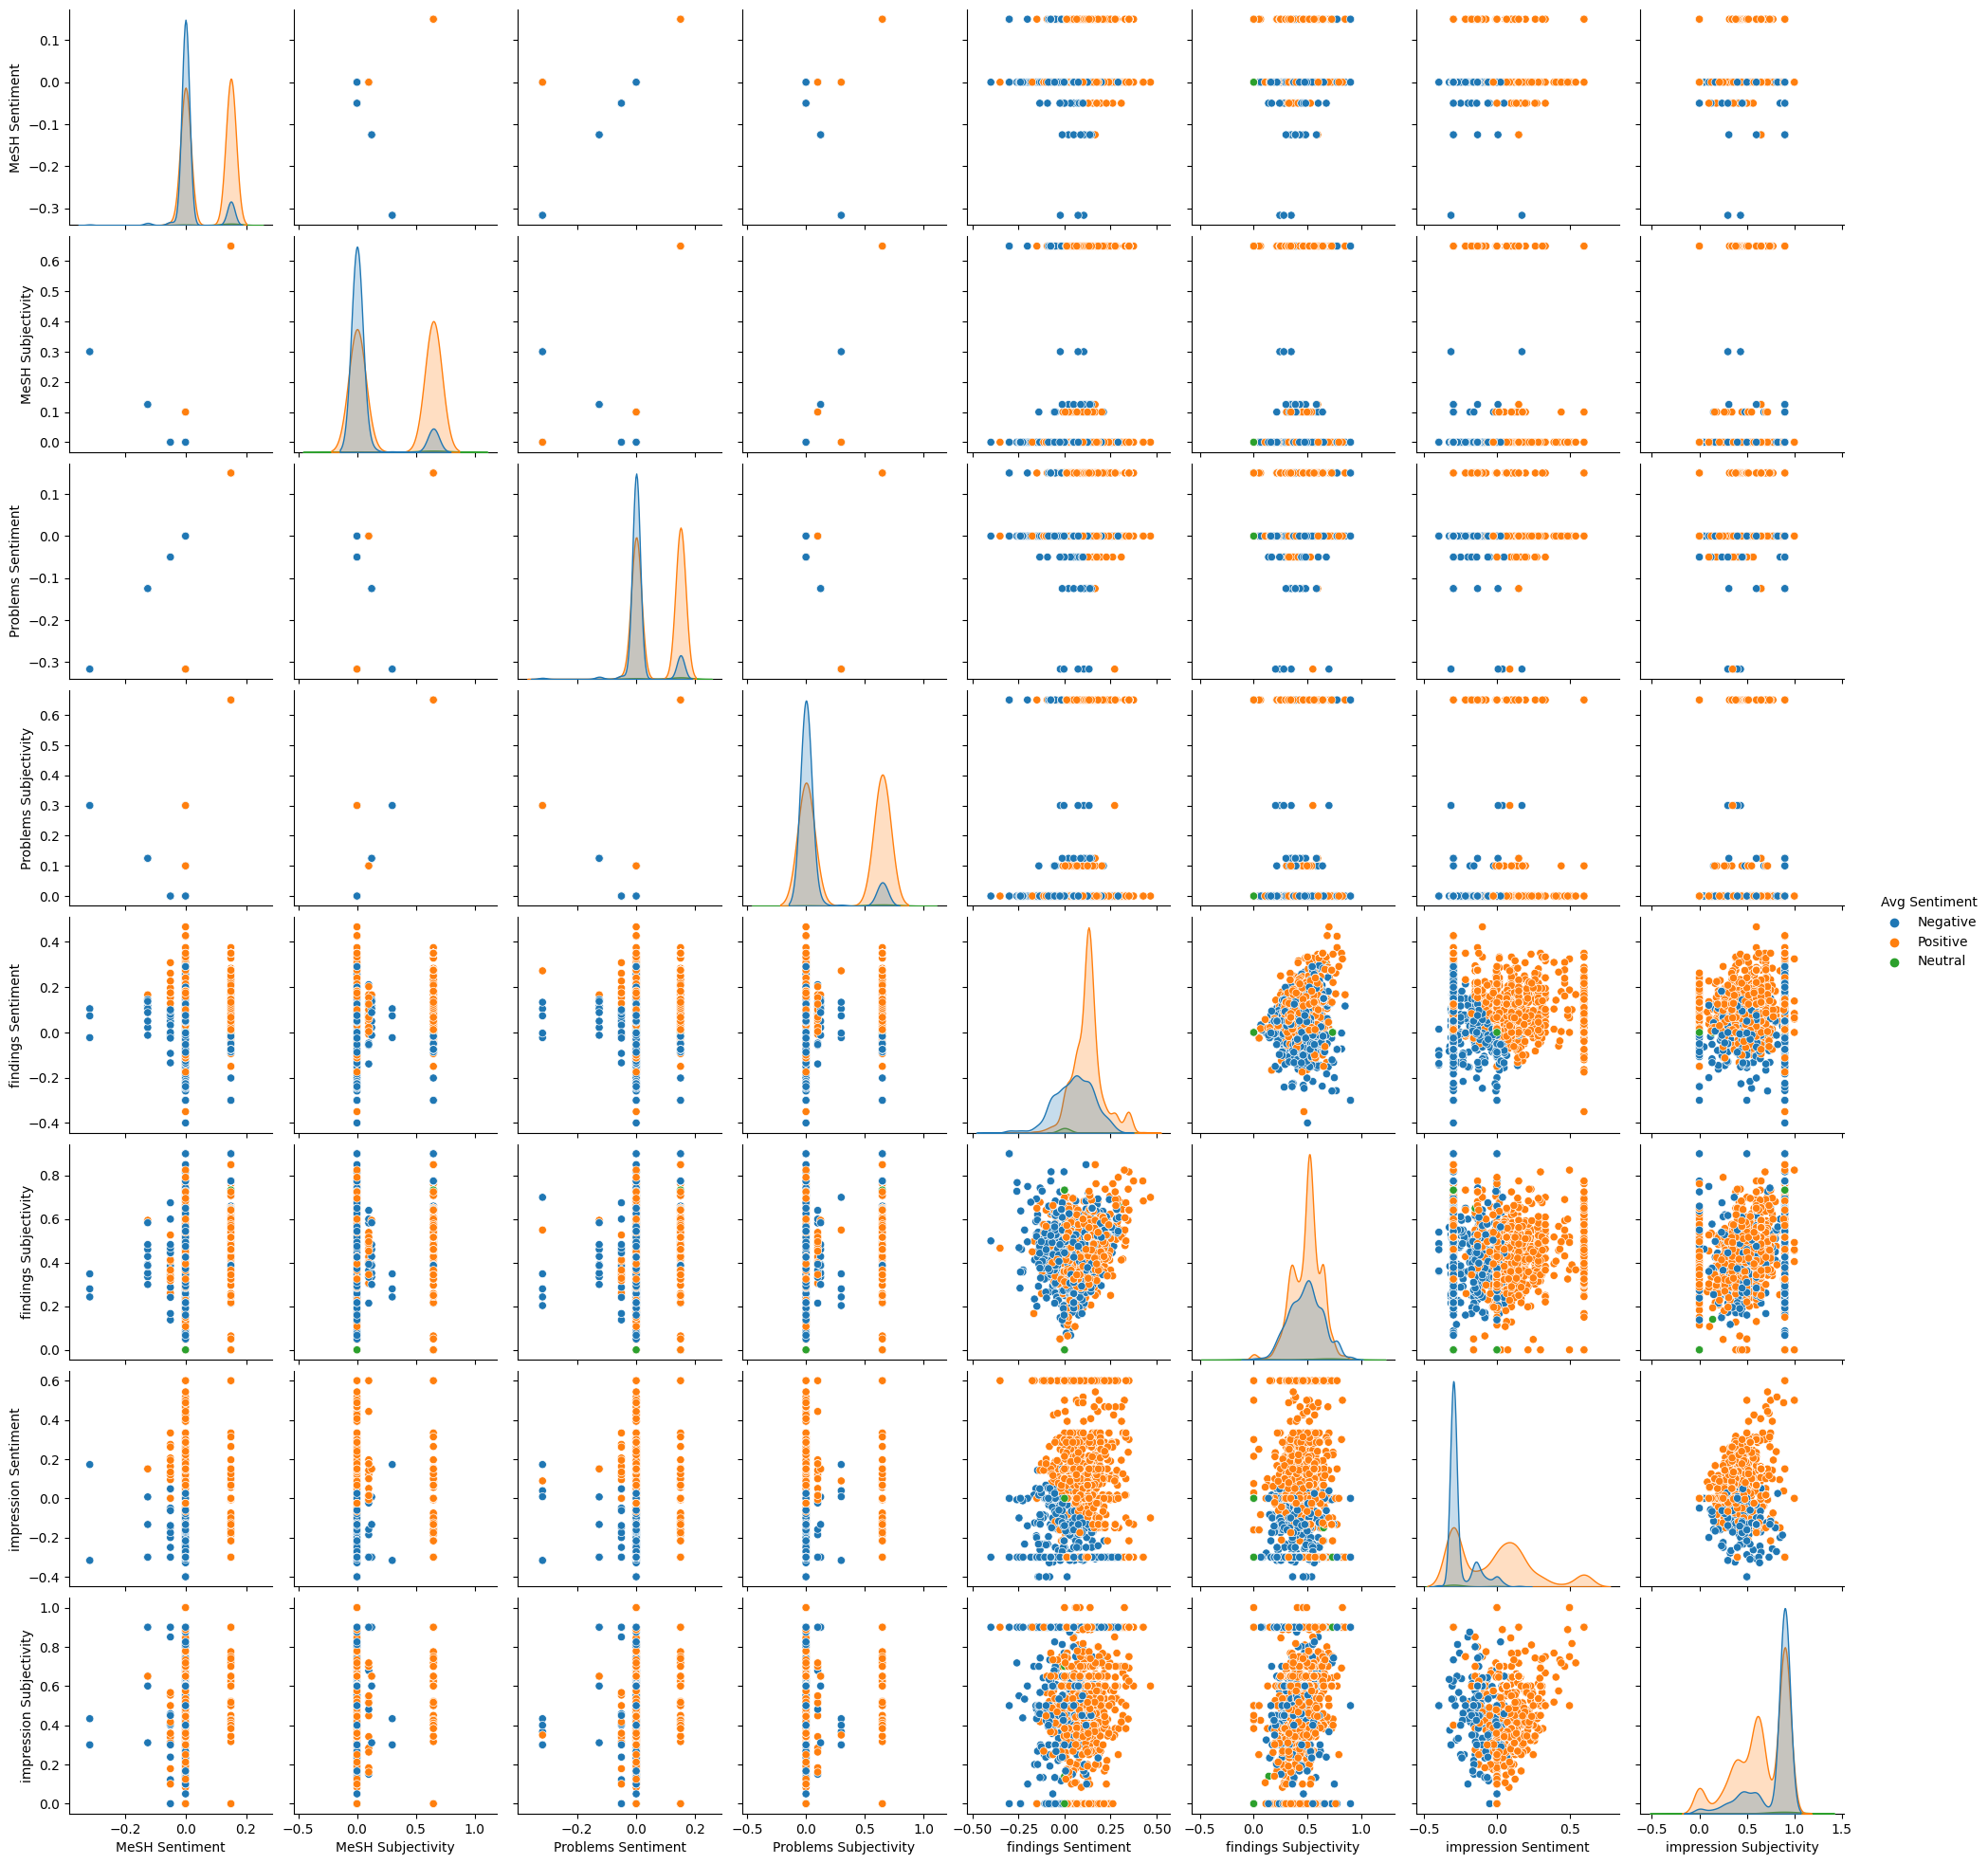

In [ ]:
sns.pairplot(data1, diag_kind="kde", hue="Avg Sentiment")

<Axes: xlabel='Avg Sentiment', ylabel='Count'>

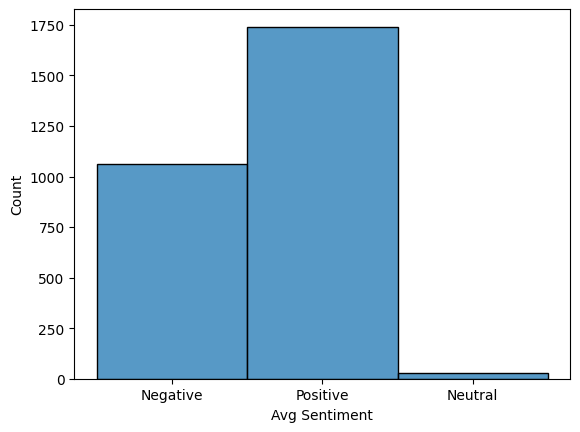

In [ ]:
sns.histplot(data=data1, x="Avg Sentiment", )

Kaggle dataset- sentiment

In [ ]:
data = pd.read_csv('/content/mtsamples.csv')

In [ ]:
data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
data.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [ ]:
data.isnull().sum()

description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [ ]:
df = data.dropna()

In [ ]:
df.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
keywords             0
dtype: int64

In [ ]:
def senti_subject1(column, data=df):
  sentiments, subjectivities = [], []
  sent_subj = [sentiment(txt) for txt in data[column]]
  for sent_subj_ in sent_subj:
    sentiments.append(sent_subj_[0])
    subjectivities.append(sent_subj_[1])

  return sentiments, subjectivities

In [ ]:
senti_subj_columns = ['description','medical_specialty','sample_name','transcription']
for col in senti_subj_columns:
  sents, subjs = senti_subject1(col)
  df[f'{col} Sentiment'] = sents
  df[f'{col} Subjectivity'] = subjs

<ipython-input-20-f42a7bdf6cf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col} Sentiment'] = sents
<ipython-input-20-f42a7bdf6cf8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col} Subjectivity'] = subjs
<ipython-input-20-f42a7bdf6cf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [ ]:
string_sentiment = []

for index, v in df[['description Sentiment', 'medical_specialty Sentiment', 'sample_name Sentiment', 'transcription Sentiment']].iterrows():
  avg_sent = sum([v['description Sentiment'], v['medical_specialty Sentiment'], v['sample_name Sentiment'], v['transcription Sentiment']])

  if avg_sent < 0:
    string_sentiment.append('Negative')
  elif avg_sent > 0:
    string_sentiment.append('Positive')
  else:
    string_sentiment.append('Neutral')

df['Avg Sentiment'] = string_sentiment
df.head()

<ipython-input-21-a25b77a5918f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg Sentiment'] = string_sentiment


,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


In [ ]:
df.to_csv('Medical_Transcriptions_pattern.csv', index=False)

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


In [ ]:
column_names = ['description Sentiment','medical_specialty Sentiment','sample_name Sentiment','transcription Sentiment']
data_frames_1 = {}

for column in column_names:
    neg_df = df[df[column] < 0.0].copy()
    pos_df = df[df[column] > 0.0].copy()
    neu_df = df[df[column] == 0.0].copy()

    # Create separate data frames
    data_frames_1[column + '_neg'] = neg_df.copy()
    data_frames_1[column + '_pos'] = pos_df.copy()
    data_frames_1[column + '_neu'] = neu_df.copy()

In [ ]:
for key in data_frames_1.keys():
    print(key)
    desc = data_frames_1[key].describe()
    display(desc)
    #dist_columns = ['description Sentiment',	'description Subjectivity',	'transcription Sentiment',	'transcription Subjectivity']
    #for column in dist_columns:
      #sns.displot(data_frames_1[key], x=column, kind='kde')
      #plt.title(f'{key} | {column}')
      #plt.tight_layout()
      #plt.show()
      #print()

    print()

description Sentiment_neg


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,-0.139865,0.342064,0.003099,0.031388,-0.003033,0.047407,0.029349,0.382427
std,0.124135,0.197175,0.012064,0.120772,0.049072,0.140697,0.074611,0.101149
min,-0.800000,0.000000,0.000000,0.000000,-0.400000,0.000000,-0.278191,0.000000
25%,-0.175000,0.200000,0.000000,0.000000,0.000000,0.000000,-0.006956,0.317840
50%,-0.100000,0.300000,0.000000,0.000000,0.000000,0.000000,0.035235,0.386532
75%,-0.050000,0.458333,0.000000,0.000000,0.000000,0.000000,0.080625,0.437755
max,-0.001190,1.000000,0.050000,0.500000,0.285714,0.750000,0.212637,1.000000



description Sentiment_pos


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,1.433000e+03,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,1.930067e-01,0.446591,0.001431,0.014904,0.009192,0.053128,0.086130,0.397150
std,1.384320e-01,0.182276,0.008338,0.083792,0.076519,0.167795,0.069669,0.087891
min,3.965082e-18,0.071429,0.000000,0.000000,-0.800000,0.000000,-0.129167,0.000000
25%,9.444444e-02,0.304167,0.000000,0.000000,0.000000,0.000000,0.041376,0.341607
50%,1.500000e-01,0.445238,0.000000,0.000000,0.000000,0.000000,0.081250,0.393356
75%,2.857143e-01,0.535714,0.000000,0.000000,0.000000,0.000000,0.129025,0.454167
max,8.000000e-01,1.000000,0.050000,0.500000,0.700000,1.000000,0.333333,0.733333



description Sentiment_neu


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,1755.0,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,0.0,0.065861,0.001738,0.017623,0.000539,0.010279,0.054193,0.370807
std,0.0,0.174215,0.009161,0.091753,0.012225,0.078738,0.080559,0.104855
min,0.0,0.000000,0.000000,0.000000,-0.050000,0.000000,-0.450000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011538,0.319676
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.051234,0.371437
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.097381,0.430407
max,0.0,1.000000,0.050000,0.500000,0.285714,1.000000,0.800000,1.000000



medical_specialty Sentiment_neg


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



medical_specialty Sentiment_pos


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,146.000000,146.000000,1.460000e+02,146.0,146.000000,146.000000,146.000000,146.000000
mean,-0.009177,0.269582,5.000000e-02,0.5,0.018291,0.109946,0.035222,0.382350
std,0.149637,0.236768,1.392556e-17,0.0,0.053356,0.210820,0.081737,0.095470
min,-0.700000,0.000000,5.000000e-02,0.5,-0.155556,0.000000,-0.278191,0.000000
25%,-0.048333,0.000000,5.000000e-02,0.5,0.000000,0.000000,-0.003314,0.329335
50%,0.000000,0.245833,5.000000e-02,0.5,0.000000,0.000000,0.048341,0.384972
75%,0.045833,0.434821,5.000000e-02,0.5,0.000000,0.118750,0.081816,0.440471
max,0.700000,1.000000,5.000000e-02,0.5,0.285714,1.000000,0.214738,0.779221



medical_specialty Sentiment_neu


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,3752.000000,3752.000000,3752.0,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,0.047605,0.255613,0.0,0.000419,0.002477,0.029792,0.062428,0.382618
std,0.158199,0.253466,0.0,0.007725,0.051627,0.125961,0.078143,0.099085
min,-0.800000,0.000000,0.0,0.000000,-0.800000,0.000000,-0.450000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.016220,0.325490
50%,0.000000,0.220238,0.0,0.000000,0.000000,0.000000,0.059290,0.382841
75%,0.103571,0.457143,0.0,0.000000,0.000000,0.000000,0.106200,0.439190
max,0.800000,1.000000,0.0,0.142857,0.700000,1.000000,0.800000,1.000000



sample_name Sentiment_neg


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.002318,0.241960,0.001351,0.013514,-0.114807,0.142810,0.062421,0.357794
std,0.109567,0.170153,0.008145,0.081449,0.131741,0.191506,0.064011,0.063779
min,-0.250000,0.000000,0.000000,0.000000,-0.800000,0.000000,-0.070186,0.232381
25%,-0.062500,0.125000,0.000000,0.000000,-0.125000,0.000000,0.012803,0.312274
50%,-0.025000,0.220238,0.000000,0.000000,-0.100000,0.125000,0.055952,0.358359
75%,0.078571,0.342143,0.000000,0.000000,-0.050000,0.200000,0.109786,0.403731
max,0.308333,0.681429,0.050000,0.500000,-0.008333,1.000000,0.226268,0.491852



sample_name Sentiment_pos


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.065576,0.456543,0.009211,0.092105,0.162554,0.511424,0.043001,0.431825
std,0.203471,0.194906,0.019447,0.194469,0.143135,0.168762,0.119226,0.100335
min,-0.700000,0.000000,0.000000,0.000000,0.050000,0.100000,-0.278191,0.197222
25%,-0.004018,0.375000,0.000000,0.000000,0.075000,0.396429,0.002923,0.367009
50%,0.075000,0.432143,0.000000,0.000000,0.100000,0.408333,0.071712,0.425789
75%,0.150000,0.535714,0.000000,0.000000,0.150000,0.650000,0.106000,0.485333
max,0.750000,1.000000,0.050000,0.500000,0.700000,1.000000,0.264286,0.779221



sample_name Sentiment_neu


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.0,3635.000000,3635.000000,3635.000000
mean,0.045956,0.248188,0.001582,0.016251,0.0,0.009420,0.062148,0.381307
std,0.157141,0.253680,0.008753,0.087801,0.0,0.074881,0.076607,0.099168
min,-0.800000,0.000000,0.000000,0.000000,0.0,0.000000,-0.450000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.016168,0.324762
50%,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.058000,0.382143
75%,0.100000,0.450000,0.000000,0.000000,0.0,0.000000,0.105000,0.438202
max,0.800000,1.000000,0.050000,0.500000,0.0,1.000000,0.800000,1.000000



transcription Sentiment_neg


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,-0.016099,0.244836,0.003040,0.030395,0.006486,0.042820,-0.048062,0.369971
std,0.156463,0.242867,0.011956,0.119563,0.054712,0.154226,0.060619,0.108060
min,-0.700000,0.000000,0.000000,0.000000,-0.300000,0.000000,-0.450000,0.066667
25%,-0.066190,0.000000,0.000000,0.000000,0.000000,0.000000,-0.061285,0.300333
50%,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,-0.027423,0.363767
75%,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,-0.012890,0.437455
max,0.600000,1.000000,0.050000,0.500000,0.600000,1.000000,-0.000322,0.800000



transcription Sentiment_pos


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,0.059081,0.260003,0.001631,0.016754,0.002414,0.031250,0.084978,0.389422
std,0.156130,0.254715,0.008882,0.089100,0.051542,0.126612,0.060617,0.085810
min,-0.800000,0.000000,0.000000,0.000000,-0.800000,0.000000,0.000233,0.076389
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041634,0.334233
50%,0.000000,0.230000,0.000000,0.000000,0.000000,0.000000,0.074762,0.386165
75%,0.128571,0.467857,0.000000,0.000000,0.000000,0.000000,0.115851,0.440064
max,0.800000,1.000000,0.050000,0.500000,0.700000,1.000000,0.800000,1.000000



transcription Sentiment_neu


,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity
count,51.000000,51.000000,51.000000,51.000000,51.0,51.0,51.0,51.000000
mean,-0.010621,0.160131,0.001961,0.022409,0.0,0.0,0.0,0.119572
std,0.103321,0.242747,0.009802,0.099478,0.0,0.0,0.0,0.253780
min,-0.300000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.362500,0.000000,0.000000,0.0,0.0,0.0,0.000000
max,0.325000,0.700000,0.050000,0.500000,0.0,0.0,0.0,1.000000


Hypothesis Testing

In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(df['description Subjectivity'], df['description Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


correlation between subjectivity scores and sentiment scores is statistically significant. In other words, there is evidence to suggest that there is a significant correlation between the two variables.
The rejection of the null hypothesis implies that there is a relationship or association between subjectivity scores and sentiment scores.

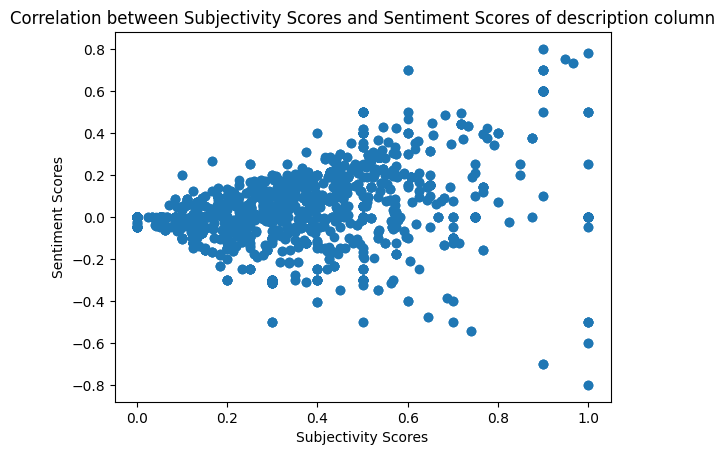

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of subjectivity scores vs sentiment scores
plt.scatter(df['description Subjectivity'], df['description Sentiment'])
plt.xlabel('Subjectivity Scores')
plt.ylabel('Sentiment Scores')
plt.title('Correlation between Subjectivity Scores and Sentiment Scores of description column')
plt.show()

In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(df['medical_specialty Subjectivity'], df['medical_specialty Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(df['sample_name Subjectivity'], df['sample_name Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 1: Correlation between subjectivity scores and sentiment scores
corr, p_value = pearsonr(df['transcription Subjectivity'], df['transcription Sentiment'])
if p_value < 0.05:
    print("Hypothesis 1: Reject the null hypothesis")
else:
    print("Hypothesis 1: Fail to reject the null hypothesis")

Hypothesis 1: Reject the null hypothesis


In [ ]:
# Hypothesis 2: Difference in subjectivity scores between different medical specialties
medical_specialties = df['medical_specialty'].unique()
groups = [df[df['medical_specialty'] == specialty]['description Subjectivity'] for specialty in medical_specialties]
f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
# Hypothesis 2: Difference in subjectivity scores between different medical specialties
medical_specialties = df['medical_specialty'].unique()
print(medical_specialties)
groups = [df[df['medical_specialty'] == specialty]['transcription Subjectivity'] for specialty in medical_specialties]

f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

[' Allergy / Immunology' ' Bariatrics' ' Cardiovascular / Pulmonary'
 ' Dentistry' ' Urology' ' General Medicine' ' Surgery'
 ' Speech - Language' ' SOAP / Chart / Progress Notes' ' Sleep Medicine'
 ' Rheumatology' ' Radiology' ' Psychiatry / Psychology' ' Podiatry'
 ' Physical Medicine - Rehab' ' Pediatrics - Neonatal' ' Pain Management'
 ' Orthopedic' ' Ophthalmology' ' Office Notes' ' Obstetrics / Gynecology'
 ' Neurosurgery' ' Neurology' ' Nephrology' ' Letters'
 ' Lab Medicine - Pathology' ' IME-QME-Work Comp etc.'
 ' Hospice - Palliative Care' ' Hematology - Oncology' ' Gastroenterology'
 ' ENT - Otolaryngology' ' Endocrinology' ' Emergency Room Reports'
 ' Discharge Summary' ' Diets and Nutritions' ' Dermatology'
 ' Cosmetic / Plastic Surgery' ' Consult - History and Phy.'
 ' Chiropractic']
Hypothesis 2: Reject the null hypothesis


In [ ]:
medical_specialties = df['medical_specialty'].unique()
groups = [df[df['medical_specialty'] == specialty]['sample_name Subjectivity'] for specialty in medical_specialties]

f_value, p_value = f_oneway(*groups)
if p_value < 0.05:
  print("Hypothesis 2: Reject the null hypothesis")
else:
  print("Hypothesis 2: Fail to reject the null hypothesis")

Hypothesis 2: Reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
t_value, p_value = ttest_ind(df[df['medical_specialty'] == 'medical_specialty_1']['description Sentiment'],
df[df['medical_specialty'] == 'medical_specialty_2']['description Sentiment'])
if p_value < 0.05:
 print("Hypothesis 3: Reject the null hypothesis")
else:
 print("Hypothesis 3: Fail to reject the null hypothesis")

Hypothesis 3: Fail to reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
t_value, p_value = ttest_ind(df[df['medical_specialty'] == 'medical_specialty_1']['transcription Sentiment'],
df[df['medical_specialty'] == 'medical_specialty_2']['description Sentiment'])
if p_value < 0.05:
 print("Hypothesis 3: Reject the null hypothesis")
else:
 print("Hypothesis 3: Fail to reject the null hypothesis")

Hypothesis 3: Fail to reject the null hypothesis


In [ ]:
#Hypothesis 3: Difference in sentiment scores between different medical specialties
t_value, p_value = ttest_ind(df[df['medical_specialty'] == 'medical_specialty_1']['sample_name Sentiment'],
df[df['medical_specialty'] == 'medical_specialty_2']['description Sentiment'])
if p_value < 0.05:
 print("Hypothesis 3: Reject the null hypothesis")
else:
 print("Hypothesis 3: Fail to reject the null hypothesis")

Hypothesis 3: Fail to reject the null hypothesis


---

In [ ]:
def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
df['summarized'] = df['transcription'].apply(lambda x: summarize(x, 0.4))

KeyboardInterrupt: ignored

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


In [ ]:
df.to_csv('Medical_Transcriptions_pattern.csv', index=False)

In [ ]:
df['summarized_sentiment'] = df['summarized'].apply(lambda x: find_sentiment(x))

KeyError: ignored

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

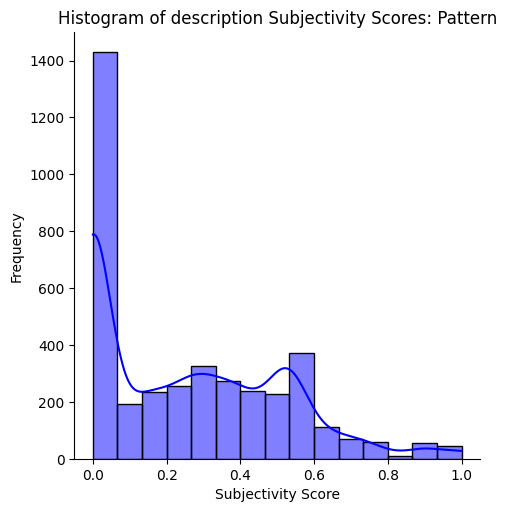

In [ ]:
sns.displot(df['description Subjectivity'], bins=15, alpha=0.5, color='blue', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of description Subjectivity Scores: Pattern')
plt.show()

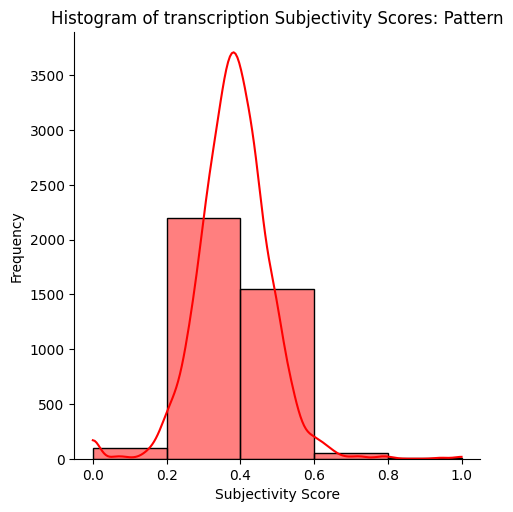

In [ ]:
sns.displot(df['transcription Subjectivity'], bins=5, alpha=0.5, color='red', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of transcription Subjectivity Scores: Pattern')
plt.show()

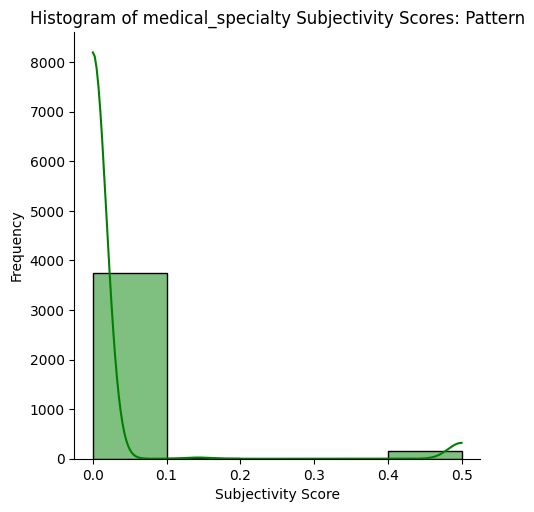

In [ ]:
sns.displot(df['medical_specialty Subjectivity'], bins=5, alpha=0.5, color='green', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of medical_specialty Subjectivity Scores: Pattern')
plt.show()

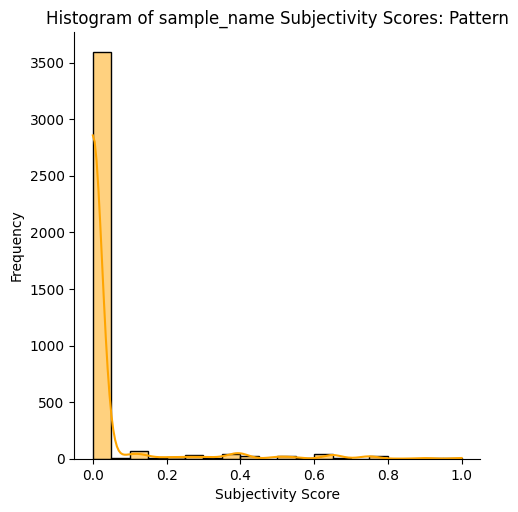

In [ ]:
sns.displot(df['sample_name Subjectivity'], bins=20, alpha=0.5, color='orange', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of sample_name Subjectivity Scores: Pattern')
plt.show()

In [ ]:
new_df = df[df.apply(lambda x: df['description Sentiment'] != 0.0)]
new_df = new_df.dropna()

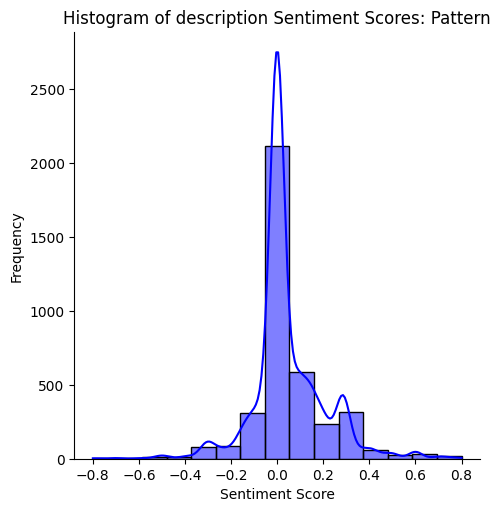

In [ ]:
sns.displot(df['description Sentiment'], bins=15, alpha=0.5, color='blue', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of description Sentiment Scores: Pattern')
plt.show()

In [ ]:
new_df1 = df[df.apply(lambda x: df['sample_name Sentiment'] != 0.0)]
new_df1 = new_df1.dropna()

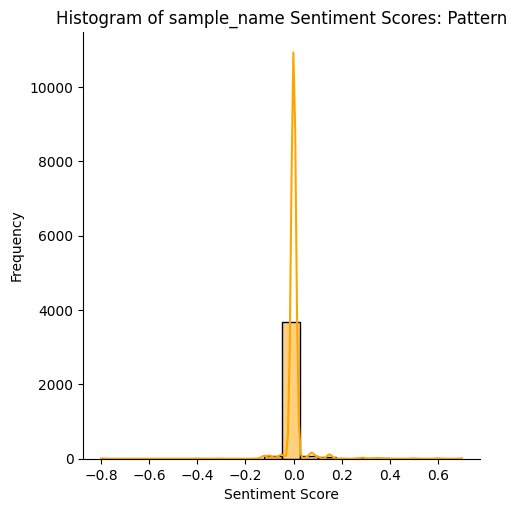

In [ ]:
sns.displot(df['sample_name Sentiment'], bins=20, alpha=0.5, color='orange', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of sample_name Sentiment Scores: Pattern')
plt.show()

In [ ]:
new_df2 = df[df.apply(lambda x: df['medical_specialty Sentiment'] != 0.0)]
new_df2 = new_df2.dropna()

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


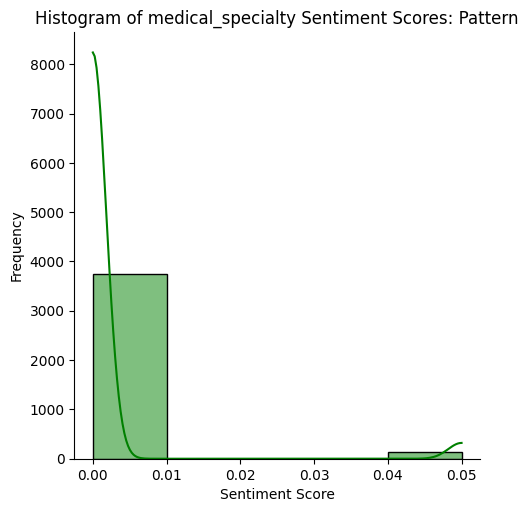

In [ ]:
sns.displot(df['medical_specialty Sentiment'], bins=5, alpha=0.5, color='green', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of medical_specialty Sentiment Scores: Pattern')
plt.show()

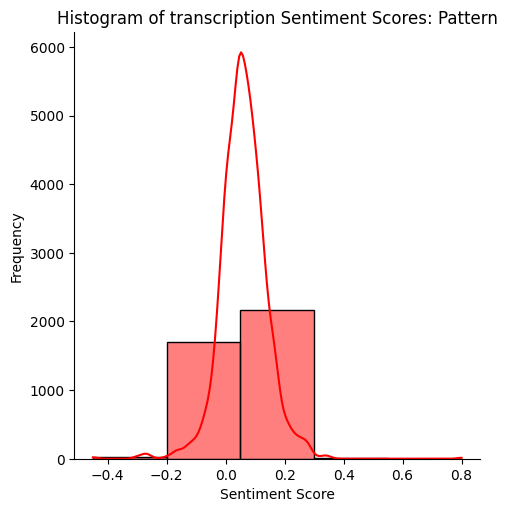

In [ ]:
sns.displot(df['transcription Sentiment'], bins=5, alpha=0.5, color='red', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of transcription Sentiment Scores: Pattern')
plt.show()

Huggingface-dataset


In [ ]:
new_df3 = data1[data1.apply(lambda x: data1['MeSH Sentiment'] != 0.0)]
new_df3 = new_df3.dropna()

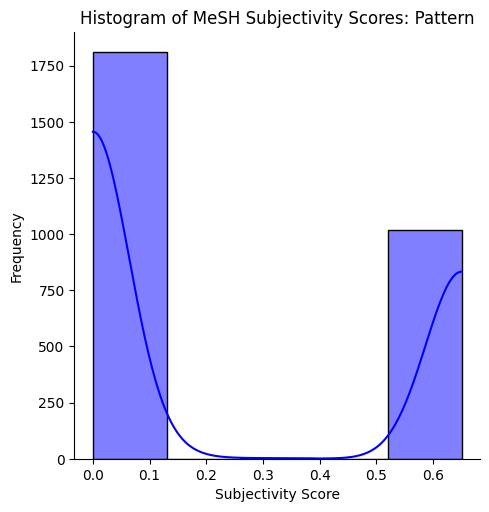

In [ ]:
sns.displot(data1['MeSH Subjectivity'], bins=5, alpha=0.5, color='blue', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of MeSH Subjectivity Scores: Pattern')
plt.show()

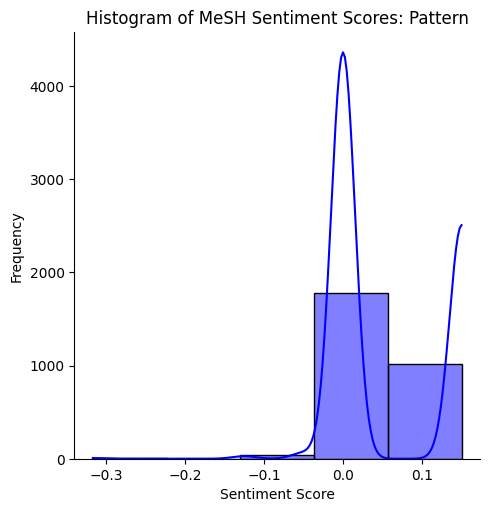

In [ ]:
sns.displot(data1['MeSH Sentiment'], bins=5, alpha=0.5, color='blue', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of MeSH Sentiment Scores: Pattern')
plt.show()

In [ ]:
data1.head()

,MeSH,Problems,findings,impression,MeSH Sentiment,MeSH Subjectivity,Problems Sentiment,Problems Subjectivity,findings Sentiment,findings Subjectivity,impression Sentiment,impression Subjectivity,Avg Sentiment
0,Atherosclerosis/aorta;Arthritis,Atherosclerosis;Arthritis,The lungs are clear. There is no pleural effus...,No acute pulmonary disease.,0.0,0.0,0.0,0.0,-0.043750,0.629167,-0.30,0.90,Negative
1,Bullous Emphysema/lung/apex/bilateral;Thoracic...,Bullous Emphysema;Thoracic Vertebrae,Cardiomediastinal silhouette are normal in siz...,1. No acute cardiopulmonary abnormality. 2. St...,0.0,0.0,0.0,0.0,0.241667,0.575000,-0.30,0.90,Negative
2,Breast Implants/bilateral,Breast Implants,The heart is normal in size. The mediastinum i...,No acute disease.,0.0,0.0,0.0,0.0,0.125000,0.516667,-0.30,0.90,Negative
3,Calcified Granuloma/lung/middle lobe,Calcified Granuloma,The cardiomediastinal silhouette is normal in ...,Negative for acute abnormality.,0.0,0.0,0.0,0.0,0.042857,0.425714,0.15,0.65,Positive
4,Lung/hypoinflation;Markings/bronchovascular,Lung;Markings,There are lower lung volumes. There is central...,No acute abnormality identified.,0.0,0.0,0.0,0.0,0.095238,0.261905,-0.30,0.90,Negative


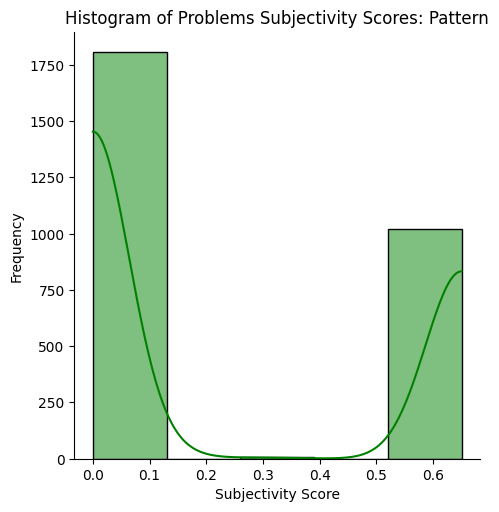

In [ ]:
sns.displot(data1['Problems Subjectivity'], bins=5, alpha=0.5, color='green', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Problems Subjectivity Scores: Pattern')
plt.show()

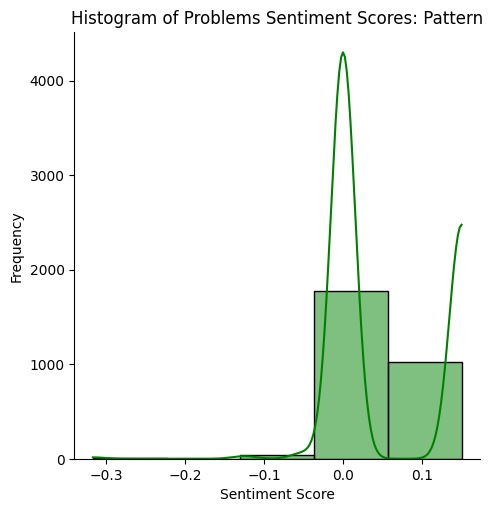

In [ ]:
sns.displot(data1['Problems Sentiment'], bins=5, alpha=0.5, color='green', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Problems Sentiment Scores: Pattern')
plt.show()

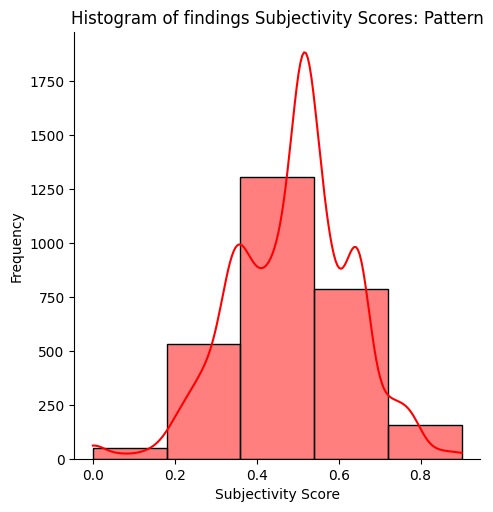

In [ ]:
sns.displot(data1['findings Subjectivity'], bins=5, alpha=0.5, color='red', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of findings Subjectivity Scores: Pattern')
plt.show()

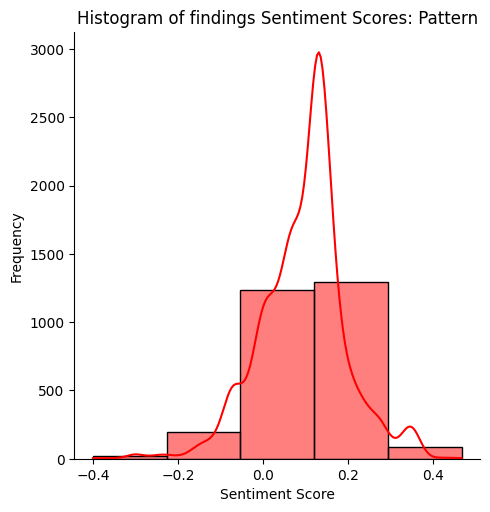

In [ ]:
sns.displot(data1['findings Sentiment'], bins=5, alpha=0.5, color='red', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of findings Sentiment Scores: Pattern')
plt.show()

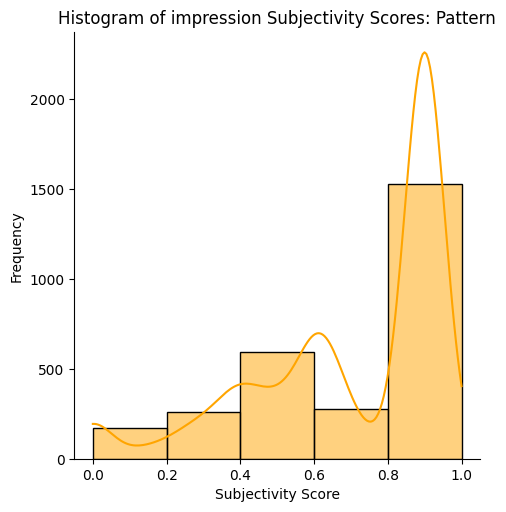

In [ ]:
sns.displot(data1['impression Subjectivity'], bins=5, alpha=0.5, color='orange', kde=True)

plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Histogram of impression Subjectivity Scores: Pattern')
plt.show()

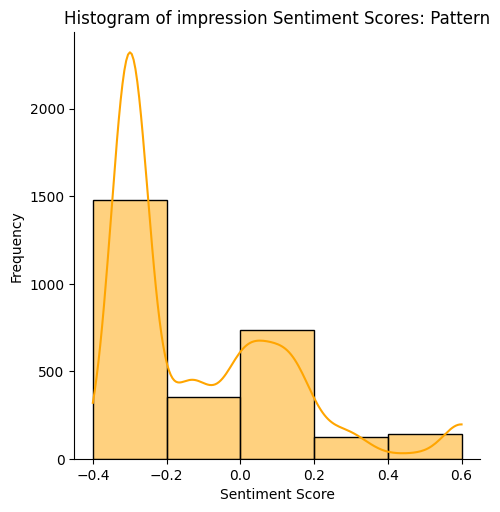

In [ ]:
sns.displot(data1['impression Sentiment'], bins=5, alpha=0.5, color='orange', kde=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of impression Sentiment Scores: Pattern')
plt.show()

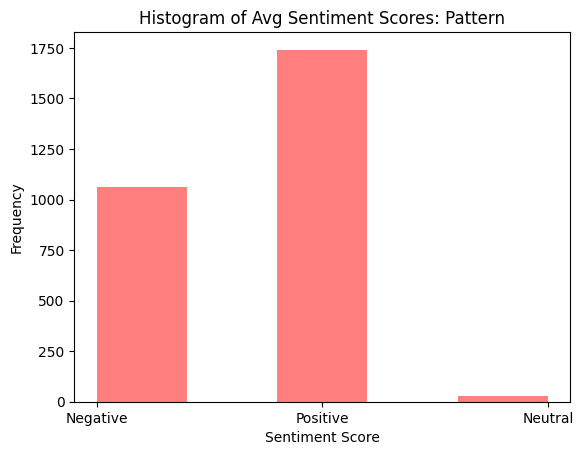

In [ ]:
plt.hist(data1['Avg Sentiment'], bins=5, alpha=0.5, color='red')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Sentiment Scores: Pattern')
plt.show()

In [ ]:
df.head()

,description,medical_specialty,sample_name,transcription,keywords,description Sentiment,description Subjectivity,medical_specialty Sentiment,medical_specialty Subjectivity,sample_name Sentiment,sample_name Subjectivity,transcription Sentiment,transcription Subjectivity,Avg Sentiment
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",-0.1,0.122222,0.0,0.0,0.0,0.0,-0.027778,0.391111,Negative
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",0.0,0.000000,0.0,0.0,0.0,0.0,0.004468,0.384613,Positive
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",0.0,0.000000,0.0,0.0,0.0,0.0,0.047297,0.371247,Positive
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",0.0,0.000000,0.0,0.0,0.0,0.0,0.121905,0.363571,Positive
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",0.0,0.000000,0.0,0.0,0.0,0.0,0.101734,0.362500,Positive


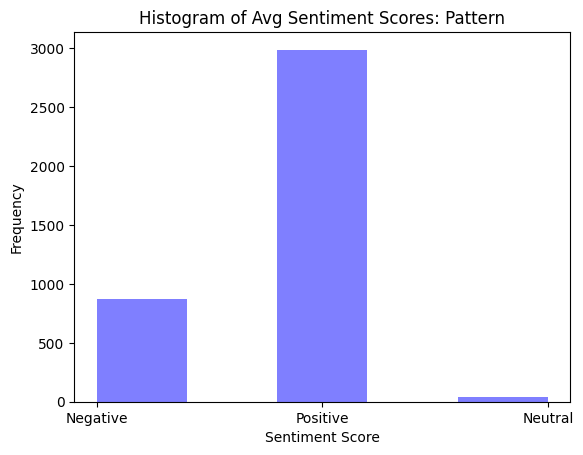

In [ ]:
plt.hist(df['Avg Sentiment'], bins=5, alpha=0.5, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Avg Sentiment Scores: Pattern')
plt.show()

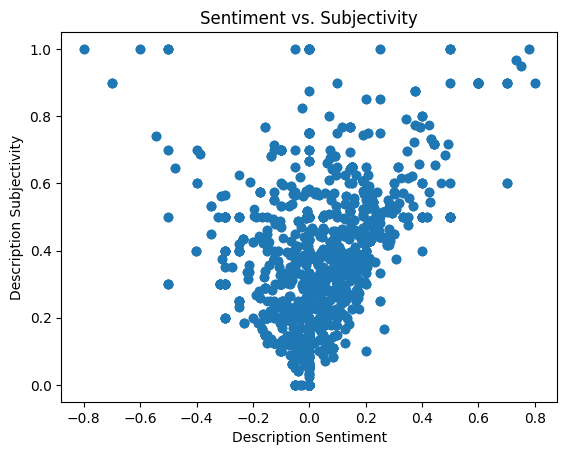

In [ ]:
plt.scatter(df['description Sentiment'], df['description Subjectivity'])
plt.xlabel('Description Sentiment')
plt.ylabel('Description Subjectivity')
plt.title('Sentiment vs. Subjectivity')
plt.show()

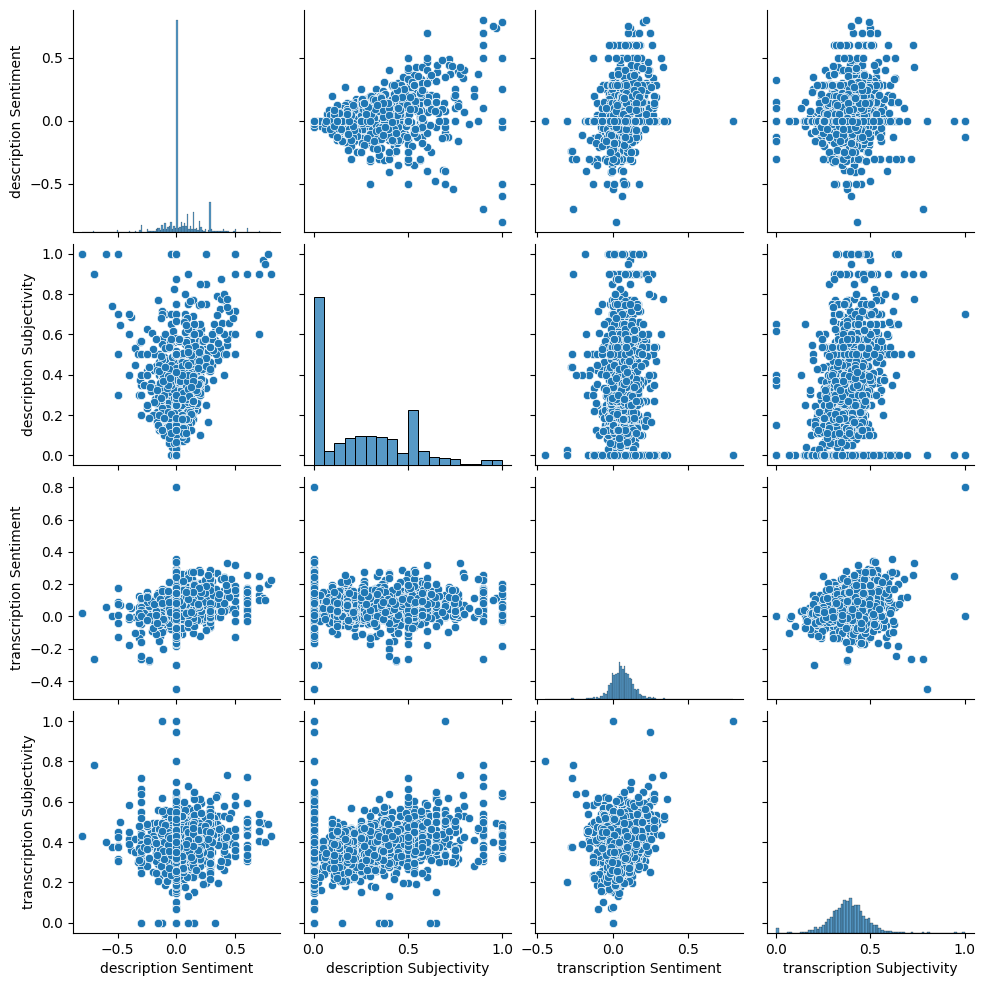

In [ ]:
sns.pairplot(df, vars=['description Sentiment', 'description Subjectivity', 'transcription Sentiment', 'transcription Subjectivity'])
plt.show()

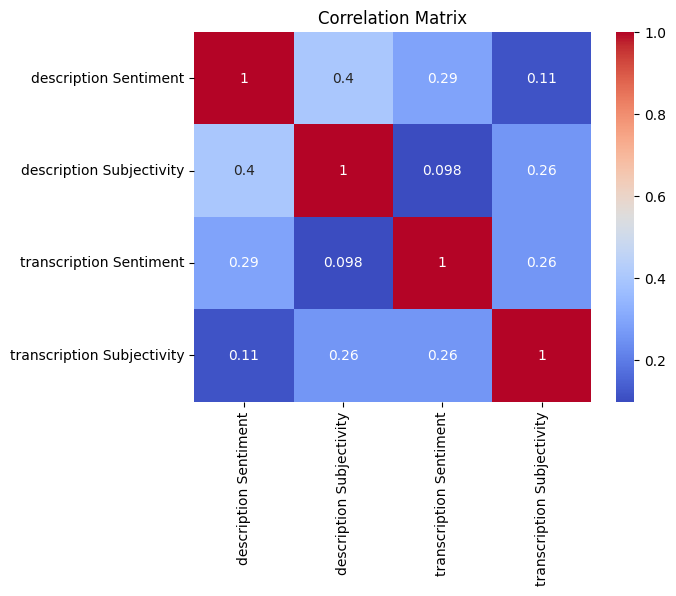

In [ ]:
corr_matrix = df[['description Sentiment', 'description Subjectivity', 'transcription Sentiment', 'transcription Subjectivity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

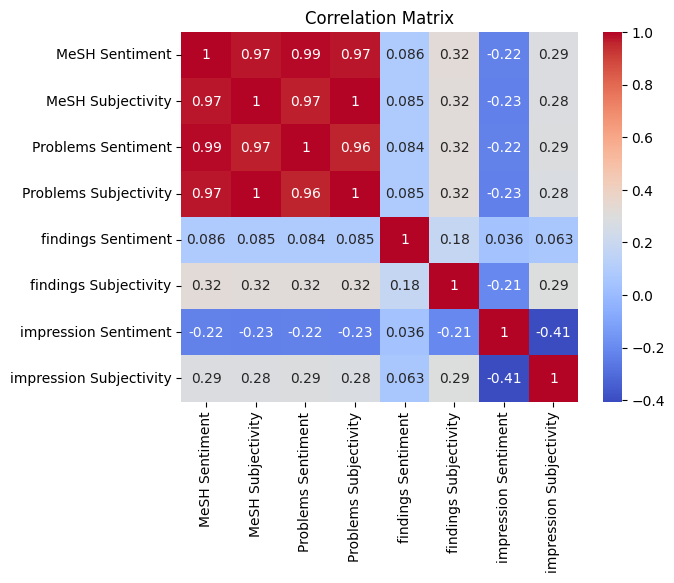

In [ ]:
corr_matrix = data1[['MeSH Sentiment', 'MeSH Subjectivity', 'Problems Sentiment', 'Problems Subjectivity','findings Sentiment', 'findings Subjectivity', 'impression Sentiment', 'impression Subjectivity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-53-0d8e8dc51c12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['keywords'] = df['keywords'].astype(str)


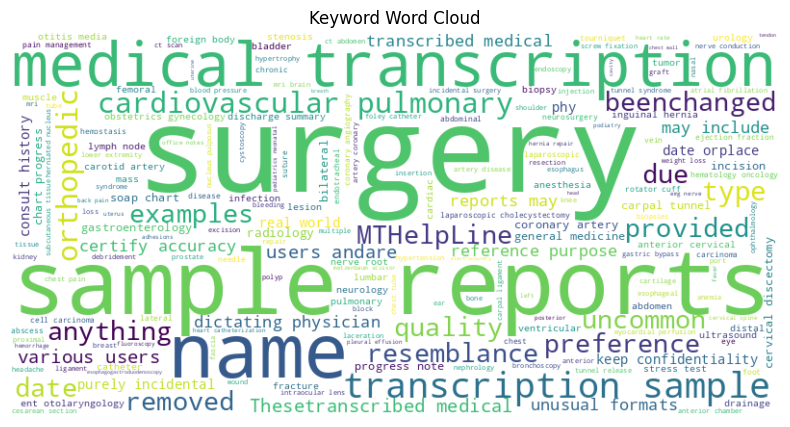

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert float values to strings
df['keywords'] = df['keywords'].astype(str)

# Concatenate all strings in the 'keywords' column
text = ' '.join(df['keywords'])

# Generate the word cloud with white color
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()



In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2831 entries, 0 to 2830
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MeSH                     2831 non-null   object 
 1   Problems                 2831 non-null   object 
 2   findings                 2831 non-null   object 
 3   impression               2831 non-null   object 
 4   MeSH Sentiment           2831 non-null   float64
 5   MeSH Subjectivity        2831 non-null   float64
 6   Problems Sentiment       2831 non-null   float64
 7   Problems Subjectivity    2831 non-null   float64
 8   findings Sentiment       2831 non-null   float64
 9   findings Subjectivity    2831 non-null   float64
 10  impression Sentiment     2831 non-null   float64
 11  impression Subjectivity  2831 non-null   float64
 12  Avg Sentiment            2831 non-null   object 
dtypes: float64(8), object(5)
memory usage: 287.6+ KB


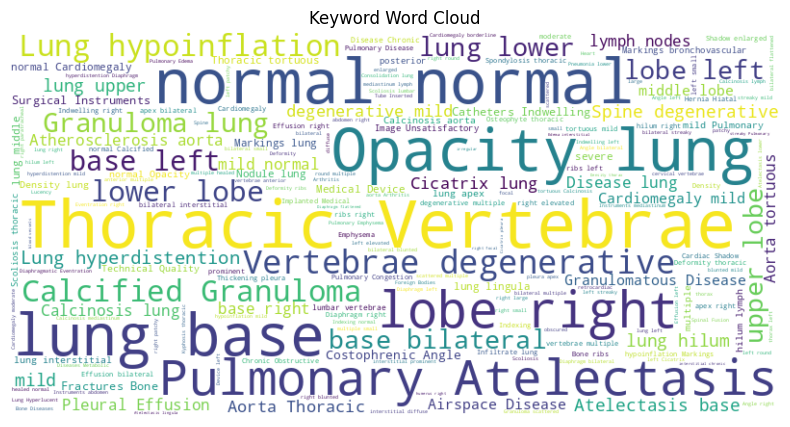

In [ ]:
data1['MeSH'] = data1['MeSH'].astype(str)

# Concatenate all strings in the 'MeSH' column
text = ' '.join(data1['MeSH'])

# Generate the word cloud with white color
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Word Cloud')
plt.show()

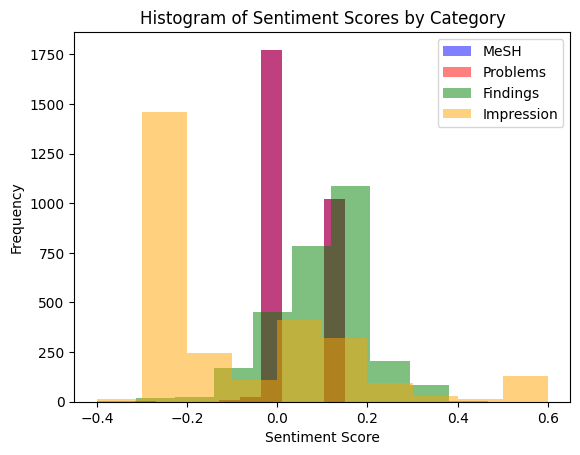

In [ ]:
plt.hist(data1['MeSH Sentiment'], bins=10, alpha=0.5, color='blue', label='MeSH')
plt.hist(data1['Problems Sentiment'], bins=10, alpha=0.5, color='red', label='Problems')
plt.hist(data1['findings Sentiment'], bins=10, alpha=0.5, color='green', label='Findings')
plt.hist(data1['impression Sentiment'], bins=10, alpha=0.5, color='orange', label='Impression')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores by Category')
plt.legend()
plt.show()